In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_regression,make_circles,make_s_curve
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import decomposition
from factor_analyzer import FactorAnalyzer

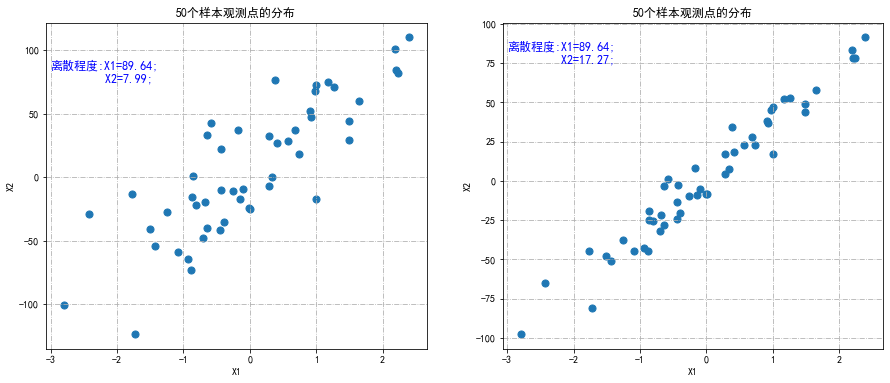

In [2]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
N=50
for i,noise in enumerate([30,10]): 
    X,Y=make_regression(n_samples=N,n_features=1,random_state=123,noise=noise,bias=0)
    X=np.hstack((X,Y.reshape(len(X),1)))
    axes[i].scatter(X[:,0],X[:,1],marker="o",s=50)
    axes[i].set_title("%d个样本观测点的分布"%N)
    axes[i].set_xlabel("X1")
    axes[i].set_ylabel("X2")
    axes[i].grid(True,linestyle='-.')
    axes[i].text(-3,75,"离散程度:X1=%.2f;\n         X2=%.2f;"
                 %(np.std(X[:,0])/np.mean(X[:,0]),np.std(X[:,1])/np.mean(X[:,1])),fontdict={'size':'12','color':'b'})   

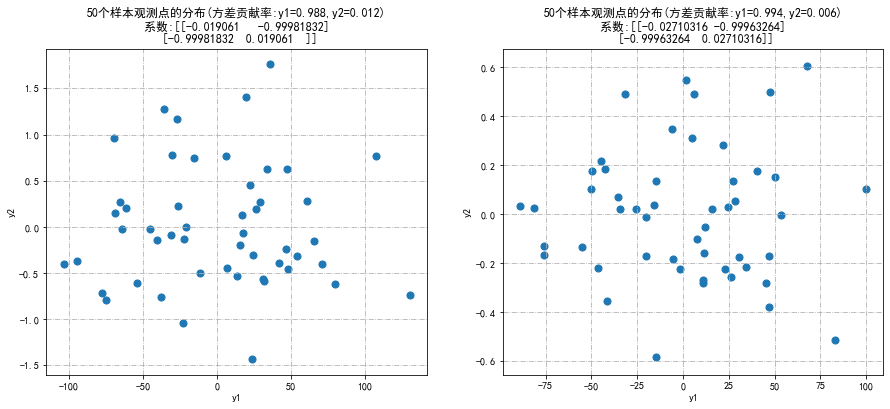

In [3]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
pca=decomposition.PCA(n_components=2,random_state=1)
for i,noise in enumerate([30,10]): 
    X,Y=make_regression(n_samples=N,n_features=1,random_state=123,noise=noise,bias=0)
    X=np.hstack((X,Y.reshape(len(X),1)))
    pca.fit(X)    
    p1=pca.singular_values_[0]/sum(pca.singular_values_) #p1=pca.explained_variance_ratio_[0]
    p2=pca.singular_values_[1]/sum(pca.singular_values_) #p2=pca.explained_variance_ratio_[1] 
    a=pca.components_
    y=pca.transform(X)
    axes[i].scatter(y[:,0],y[:,1],marker="o",s=50)
    axes[i].set_title("%d个样本观测点的分布(方差贡献率:y1=%.3f,y2=%.3f)\n系数:%s"%(N,p1,p2,a))
    axes[i].set_xlabel("y1")
    axes[i].set_ylabel("y2")
    axes[i].grid(True,linestyle='-.')      


代码说明：
（1）第2行：定义主成分分析对象，指定提取2个主成分。
（2）第3至15行：生成数据集。进行主成分分析。计算各主成分的方差贡献率。可视化主成分分析结果。
